<a href="https://colab.research.google.com/github/Raghuvorkady/AI_ML_DL-Course_Files/blob/main/plate_localization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opencv-python
!pip install opencv-contrib-python
!pip install matplotlib
!pip install Pillow
!pip install pytesseract
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [3]:
import cv2
import random
import os
#import imutils
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pytesseract.pytesseract.tesseract_cmd = (r'/usr/bin/tesseract')

In [4]:
print(cv2.__version__)

4.1.2


In [414]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

In [147]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
      angle = -(90 + angle)
    else:
      angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

In [436]:
ls -l '/content/gdrive/My Drive/Colab Notebooks/working_sample/data/images'

total 33045
-rw------- 1 root root 8505516 Nov 29 12:16 bike1.jpg
-rw------- 1 root root 3303284 Nov 29 12:16 bike2.jpg
-rw------- 1 root root 3705031 Nov 29 12:16 bike3.jpg
-rw------- 1 root root 1393699 Nov 29 12:16 bike.jpg
-rw------- 1 root root   49500 Nov 28 06:10 car_10.jpg
-rw------- 1 root root   57064 Nov 28 06:10 car_1.jpg
-rw------- 1 root root   56009 Nov 28 06:10 car_2.jpg
-rw------- 1 root root   73112 Nov 28 06:10 car_3.jpg
-rw------- 1 root root  188772 Nov 28 06:10 car_4.jpg
-rw------- 1 root root   46799 Nov 28 06:10 car_5.jpg
-rw------- 1 root root   81038 Nov 28 06:10 car_6.jpg
-rw------- 1 root root  481235 Nov 28 06:10 car_7.jpg
-rw------- 1 root root   71214 Nov 28 06:10 car_8.jpg
-rw------- 1 root root 1734822 Nov 28 06:10 car_9.jpg
-rw------- 1 root root 4291904 Nov 29 12:16 car.jpg
-rw------- 1 root root 4598134 Nov 30 10:14 myCar4.jpg
-rw------- 1 root root 5196034 Nov 30 10:14 plate.jpg


In [8]:
images_dir = "/content/gdrive/My Drive/Colab Notebooks/working_sample/data/images"

In [553]:
image_path = "{}/{}".format(images_dir, "car_6.jpg")

In [554]:
image = cv2.imread(image_path)
#image = imutils.resize(image, width=500)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)


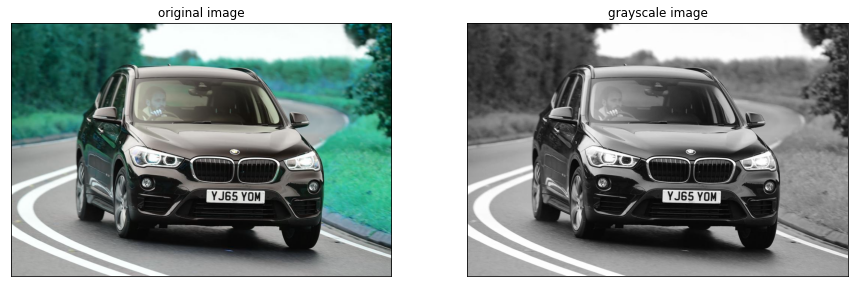

In [555]:
plot_images(image, gray,title1="original image",title2="grayscale image")

In [556]:
blur = cv2.bilateralFilter(gray, 11, 90, 90)

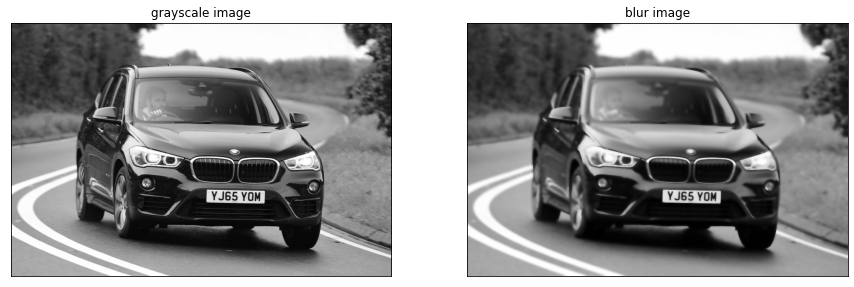

In [557]:
plot_images(gray, blur, title1="grayscale image", title2="blur image")

In [558]:
edges = cv2.Canny(blur, 30, 200)

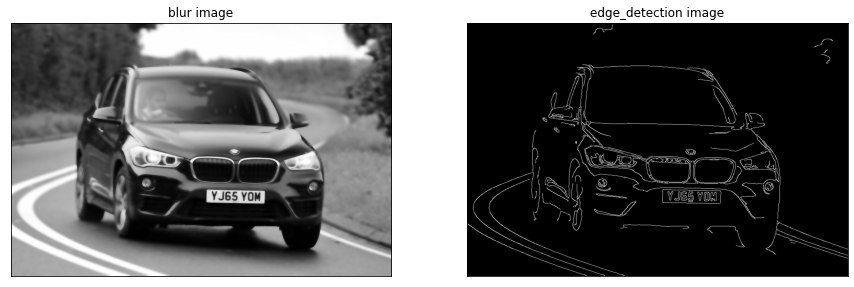

In [559]:
plot_images(blur, edges, title1="blur image", title2="edge_detection image")

In [560]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [561]:
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)
NumberPlateCount = None

In [562]:
image_copy = image.copy()

In [563]:
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255), 2)

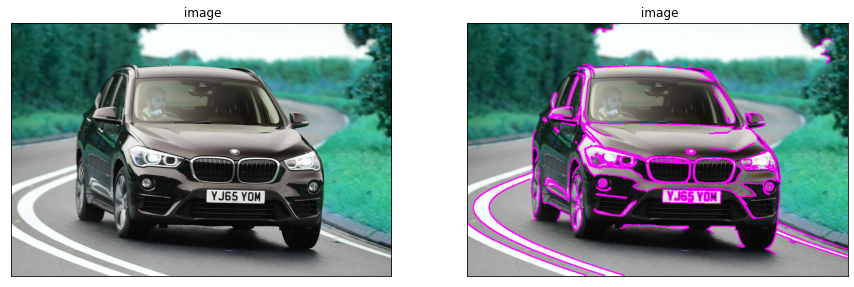

In [564]:
plot_images(image, image_copy,title1=" image",title2=" image")

In [565]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]

In [566]:
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255), 2)

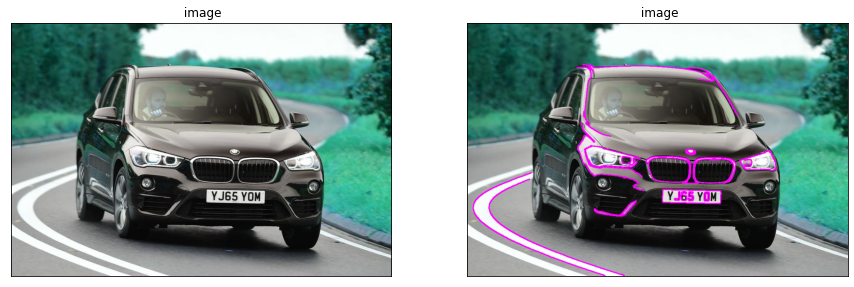

In [567]:
plot_images(image, image_copy,title1=" image",title2=" image")

In [568]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break

cv2.imwrite("plate.png", plate)

True

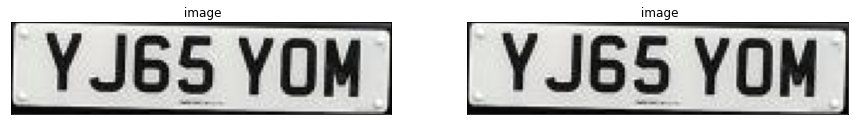

In [569]:
plot_images(plate, plate, title1=" image", title2=" image")

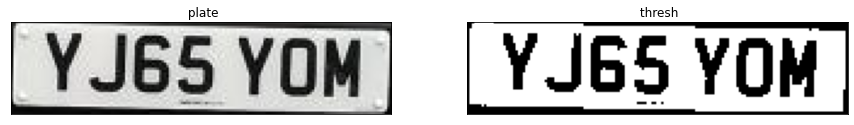

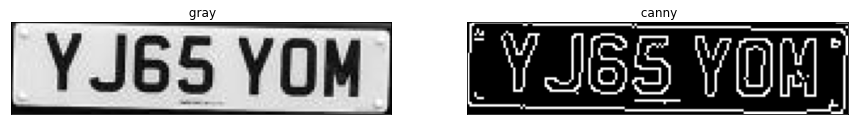

In [570]:
gray = get_grayscale(plate)
thresh = thresholding(gray)
#opening = deskew(gray)
canny = cv2.Canny(plate, 100, 200)
plot_images(plate, thresh, title1=" plate", title2=" thresh")
plot_images(gray, canny, title1=" gray", title2=" canny")

In [571]:
plateText = pytesseract.image_to_string(plate)
threshText = pytesseract.image_to_string(thresh)
cannyText = pytesseract.image_to_string(canny)
grayText = pytesseract.image_to_string(gray)

In [572]:
print("plateText:",plateText)
print("threshText:",threshText)
print("grayText:",grayText)
print("cannyText:",cannyText)

plateText: YJ65 YOM

threshText: YJ65 YOM

grayText: YJ65 YOM

cannyText: RAS

